In [1]:
import os
import sys
import time
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

folder = os.path.dirname('../')
sys.path.append(folder)

from codebase.utils.log import Log
from codebase.datasets import TextDataset, DataPreprocess
from codebase.utils.prepare import Preparation
from codebase.condGAN import condGAN
%matplotlib inline

In [2]:
# Preparing environment
prep = Preparation()
cfg = prep.set_config('cfg/eval_bird.yml')
prep.set_random_seed()
output_dir = prep.set_output_dir()
prep.set_cuda()
prep.show_config()

{'B_VALIDATION': False,
 'CONFIG_NAME': 'Eval1',
 'CUDA': False,
 'DATASET_NAME': 'birds',
 'DATA_DIR': '../data/birds',
 'GAN': {'B_ATTENTION': True,
         'B_DCGAN': False,
         'CONDITION_DIM': 100,
         'DF_DIM': 64,
         'GF_DIM': 32,
         'R_NUM': 2,
         'Z_DIM': 100},
 'GPU_ID': -1,
 'MANUAL_SEED': None,
 'RNN_TYPE': 'LSTM',
 'SAVE_DIR': '../results',
 'TEXT': {'CAPTIONS_PER_IMAGE': 10,
          'EMBEDDING_DIM': 256,
          'RNN_LAYERS': 1,
          'WORDS_NUM': 25},
 'TRAIN': {'BATCH_SIZE': 1,
           'B_NET_D': True,
           'DISCRIMINATOR_LR': 0.0002,
           'ENCODER_LR': 0.0002,
           'FLAG': False,
           'GENERATOR_LR': 0.0002,
           'MAX_EPOCH': 600,
           'NET_D': ['../models/birds/netD0_epoch_600.pth',
                     '../models/birds/netD1_epoch_600.pth',
                     '../models/birds/netD2_epoch_600.pth'],
           'NET_E': '',
           'NET_E_IMG': '',
           'NET_E_TEXT': '../DAMSMencoder

In [3]:
# Init log
log = Log(output_dir)

# Get data loader
dataprep = DataPreprocess(log)
image_transform = dataprep.image_transform()
dataloader, dataset = dataprep.get_dataloader('test', image_transform, True)

# Define models and go to evaluate
model = condGAN(output_dir, dataloader, dataset.n_words, dataset.ixtoword, log)
start_t = time.time()

Transform: 256
Total filenames:  11788 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
Load filenames from: ../data/birds/train/filenames.pickle (8855)
Load filenames from: ../data/birds/test/filenames.pickle (2933)
Load from:  ../data/birds/captions.pickle
Dataset test: n_words=5450 emb_num=10
CUDA status: False
GPU ID: -1
Init condGAN ... 


In [16]:
# Make captions
sentences= [
#'a small red bird',
#'a small orange bird',
#'a small blue bird',
#'a small yellow bird',    
#'a small black bird'
#'a small white bird with orange bill',
#'a large red bird with black beak',
#'a small black bird with a yellow head'
#'a large yellow bird with long black beak' 
#'a tiny orange bird with green crown and needle beak'       
#'this bird is red with white and has a very short beak'
#'this white and grey bird has black wings and orange crown'
#'this large green bird has blue wigs, red crown and a long black beak'    
'this bird has a green crown, black wings and a yellow belly'
]

tries = 5
threshold = 0.05


In [17]:
# Make captions
data_dic = {}
captions, cap_lens = model.tokenize_sentences(sentences, dataset.wordtoix)
cap_array, cap_lens, sorted_indices = model.process_captions(captions, cap_lens, sort=False)
data_dic['generated'] = [cap_array, cap_lens, sorted_indices]

# Generate images from pre-extracted embeddings
images = model.generate_images(data_dic, tries, threshold)  # generate images for customized captions
end_t = time.time()
log.add('Total time for evaluation: {}'.format(end_t - start_t))

/home/aleksey/.local/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Load text encoder from: ../DAMSMencoders/birds/text_encoder200.pth
Number of nets G/D: 3
Load G from: ../models/birds/attn2o_netG_epoch_600.pth
Load D0 from: ../models/birds/netD0_epoch_600.pth
Load D1 from: ../models/birds/netD1_epoch_600.pth
Load D2 from: ../models/birds/netD2_epoch_600.pth


/home/aleksey/.local/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/aleksey/.local/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
../codebase/global_attention.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn = self.sm(attn)  # Eq. (2)
/home/aleksey/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is de

Total time for evaluation: 2089.2600808143616


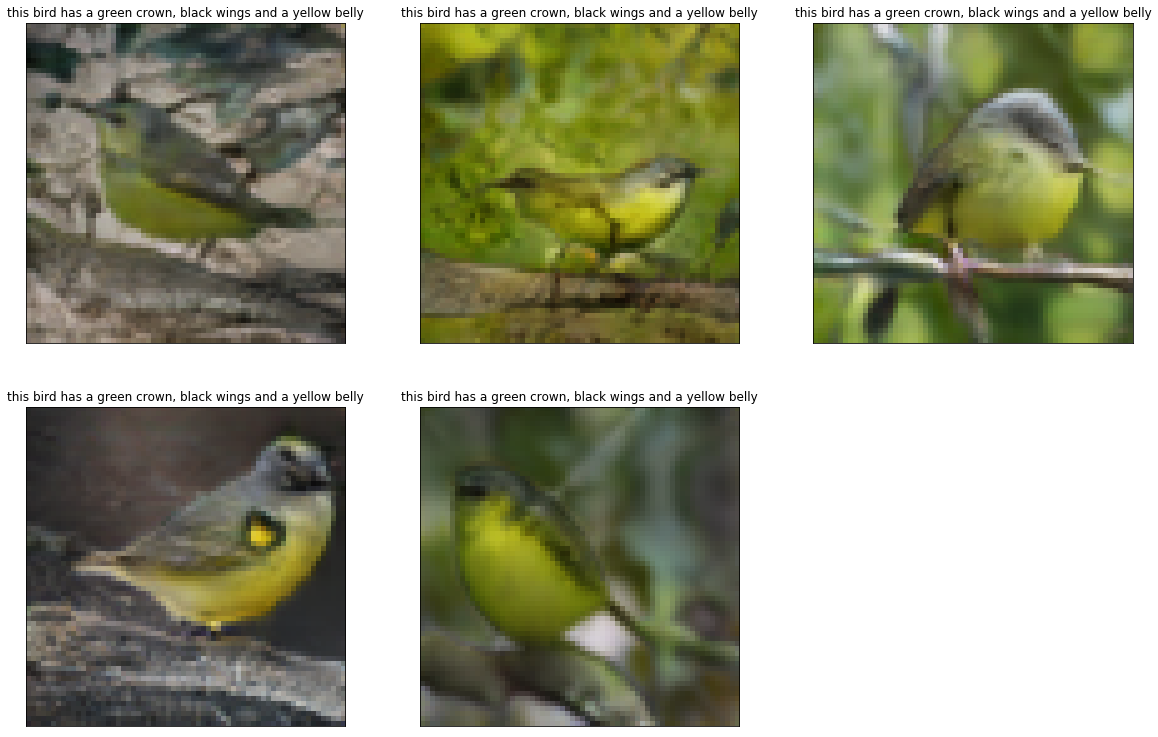

In [22]:
fig = plt.figure(figsize=(20,20))
for tr in range(tries):
    for i, path in enumerate(images[0][0][tr]):   
        img = Image.open(path)
        ax = fig.add_subplot(3,3, tr + i + 1, xticks=[], yticks=[], title=sentences[i])
        ax.imshow(np.asarray(img))    

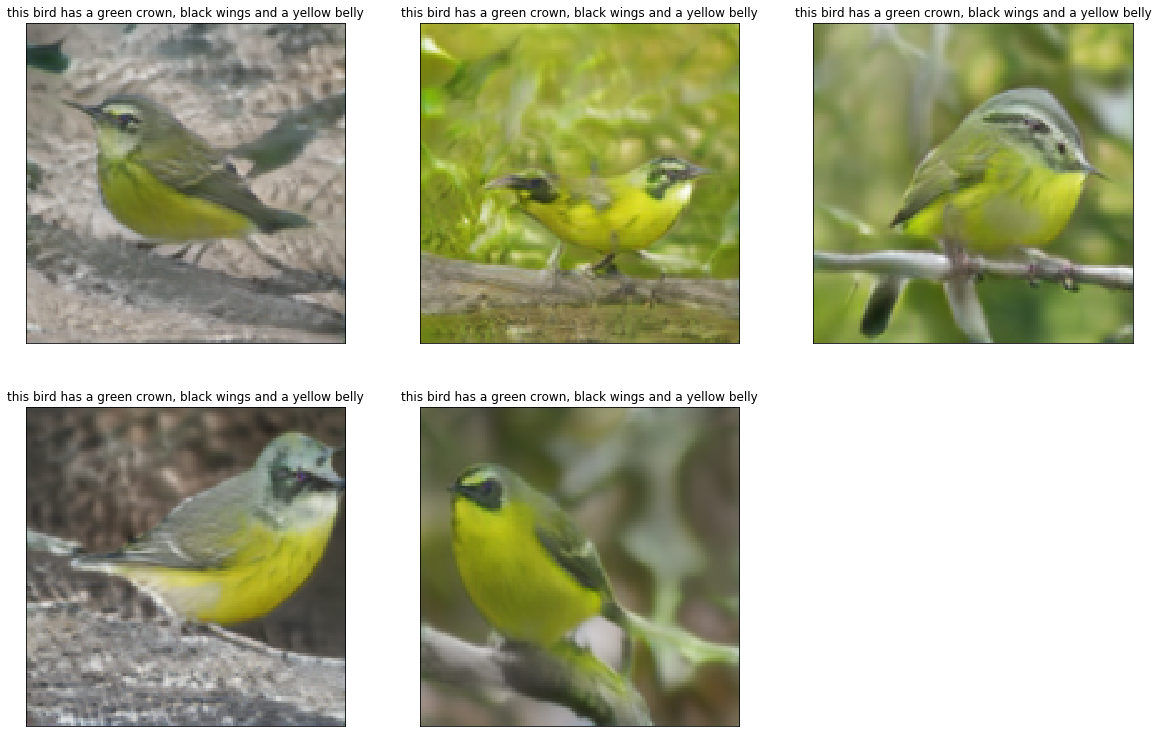

In [23]:
fig = plt.figure(figsize=(20,20))
for tr in range(tries):
    for i, path in enumerate(images[0][1][tr]):   
        img = Image.open(path)
        ax = fig.add_subplot(3,3, tr + i + 1, xticks=[], yticks=[], title=sentences[i])
        ax.imshow(np.asarray(img)) 

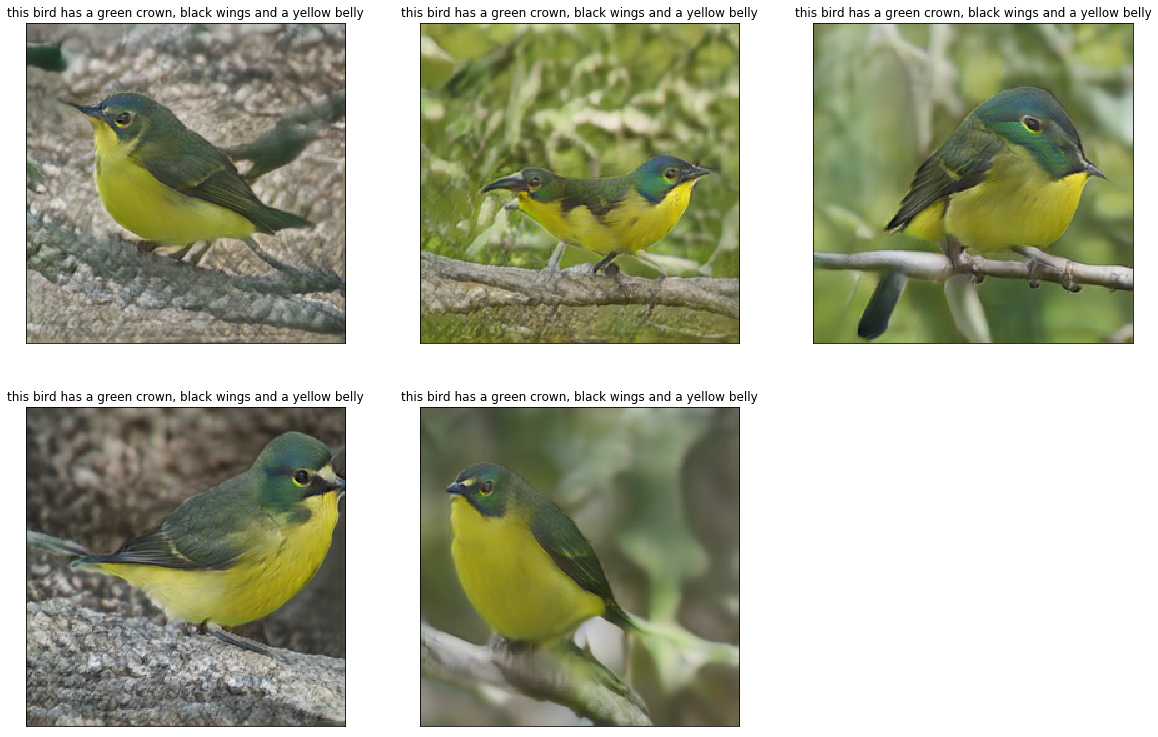

In [24]:
fig = plt.figure(figsize=(20,20))
for tr in range(tries):
    for i, path in enumerate(images[0][2][tr]):   
        img = Image.open(path)
        ax = fig.add_subplot(3,3, tr + i + 1, xticks=[], yticks=[], title=sentences[i])
        ax.imshow(np.asarray(img)) 

In [21]:
print (images)

[{0: [['../results/generated/0_s_0_g0_0.png'], ['../results/generated/0_s_0_g0_1.png'], ['../results/generated/0_s_0_g0_2.png'], ['../results/generated/0_s_0_g0_3.png'], ['../results/generated/0_s_0_g0_4.png']], 1: [['../results/generated/0_s_0_g1_0.png'], ['../results/generated/0_s_0_g1_1.png'], ['../results/generated/0_s_0_g1_2.png'], ['../results/generated/0_s_0_g1_3.png'], ['../results/generated/0_s_0_g1_4.png']], 2: [['../results/generated/0_s_0_g2_0.png'], ['../results/generated/0_s_0_g2_1.png'], ['../results/generated/0_s_0_g2_2.png'], ['../results/generated/0_s_0_g2_3.png'], ['../results/generated/0_s_0_g2_4.png']]}]
